In [1]:
#import library
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import collections
from heapq import nlargest
from datetime import date

In [2]:
##Functions

def monthName(arg):
    switcher = {
        1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr',5 : 'May', 6 : 'Jun',
        7 : 'Jul', 8 : 'Aug',9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'
    }
    return switcher.get(arg, "None")

def monthFull(arg):
    switcher = {
        'Jan' : 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April',
        'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August',
        'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'
    }
    return switcher.get(arg, "None")

def repCustomer(list1,list2):
    list3 = [value for value in list1 if value in list2]
    return list3
    
def newCustomer(list1,list2):
    list3 = [value for value in list1 if value not in list2]
    return list3

def qtrYear(data, year):
    qt_out = {'q1': [], 'q2':[], 'q3':[], 'q4':[]}
    for i in range(len(data)):
        if data['Year'][i] == year:
            if data['Month'][i] <= 3:
                qt_out['q1'].append(data['member_id'][i])
            elif 3 < data['Month'][i] <= 6:
                qt_out['q2'].append(data['member_id'][i])
            elif 7 < data['Month'][i] <= 9:
                qt_out['q3'].append(data['member_id'][i])
            elif 10 < data['Month'][i] <= 12:
                qt_out['q4'].append(data['member_id'][i])    
    
    return qt_out

In [3]:
#import data
data = pd.read_csv('Groceries_dataset.csv')
n_data = len(data)
data.head()

,member_id,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
#update data
data['Day'] = ""
data['Month'] = ""
data['Year'] = ""
data['Weekday'] = ""
for i in range(n_data):
    to_date = data['Date'][i]
    dd = to_date.split('-')
    data['Day'][i] = int(dd[0])
    data['Month'][i] = int(dd[1])
    data['Year'][i] = int(dd[2])
    data['Weekday'][i] = (datetime.date(int(dd[2]), int(dd[1]), int(dd[0]))).strftime("%A")
print(data)

       member_id        Date        itemDescription Day Month  Year    Weekday
0           1808  21-07-2015         tropical fruit  21     7  2015    Tuesday
1           2552  05-01-2015             whole milk   5     1  2015     Monday
2           2300  19-09-2015              pip fruit  19     9  2015   Saturday
3           1187  12-12-2015       other vegetables  12    12  2015   Saturday
4           3037  01-02-2015             whole milk   1     2  2015     Sunday
...          ...         ...                    ...  ..   ...   ...        ...
38760       4471  08-10-2014          sliced cheese   8    10  2014  Wednesday
38761       2022  23-02-2014                  candy  23     2  2014     Sunday
38762       1097  16-04-2014               cake bar  16     4  2014  Wednesday
38763       1510  03-12-2014  fruit/vegetable juice   3    12  2014  Wednesday
38764       1521  26-12-2014               cat food  26    12  2014     Friday

[38765 rows x 7 columns]
CPU times: user 5min 8s, s

In [5]:
#no of products
product = data['itemDescription'].unique()
no_pro = len(product)
print(f"Total no of products is {no_pro}")

Total no of products is 167


In [6]:
#no of customers
customers = data['member_id'].unique()
no_customer = len(customers)
print(f"Total no of customers is {no_customer}")

Total no of customers is 3898


In [7]:
#year data
no_sales = n_data
sales_2014 = sales_2015 = 0

data_2014 = []
data_2015 = []

for i in range(n_data):
    if data['Year'][i] == 2014:
        data_2014.append(i)
    else:
        data_2015.append(i)

sales_2014 = len(data_2014)
sales_2015 = len(data_2015)

print(f'Total sales in years 2014 and 2015 combines is {no_sales}')
print(f'Total sales in year 2014 is {sales_2014}')
print(f'Total sales in year 2015 is {sales_2015}')

Total sales in years 2014 and 2015 combines is 38765
Total sales in year 2014 is 18277
Total sales in year 2015 is 20488


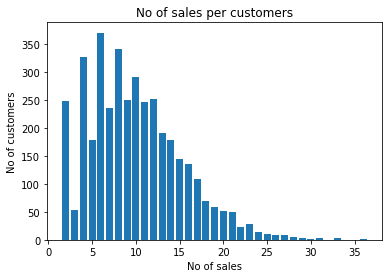

In [8]:
#no of purchases per customers
customer_purchase = {}
for i in range(n_data):
    if data['member_id'][i] in customer_purchase:
        customer_purchase[data['member_id'][i]] += 1
    else:
        customer_purchase[data['member_id'][i]] = 1

no_purchase = {}
for i in customer_purchase:
    if customer_purchase[i] in no_purchase:
        no_purchase[customer_purchase[i]] += 1
    else:
        no_purchase[customer_purchase[i]] = 1

od_purchase = collections.OrderedDict(sorted(no_purchase.items()))
plt.bar(od_purchase.keys(),od_purchase.values())
plt.xlabel('No of sales')
plt.ylabel('No of customers')
plt.title('No of sales per customers')
plt.show()

In [9]:
#most and least sales per weekday
weekday =  {'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':0,'Sunday':0}
weekday_2015 = {'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':0,'Sunday':0}
weekday_2014 = {'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':0,'Sunday':0}
for i in range(n_data):
    if data['Year'][i] == 2014:
        weekday_2014[data['Weekday'][i]] += 1
        weekday[data['Weekday'][i]] += 1
    else:
        weekday_2015[data['Weekday'][i]] += 1
        weekday[data['Weekday'][i]] += 1

max_wk_2014 = max(weekday_2014, key = weekday_2014.get)
min_wk_2014 = min(weekday_2014, key = weekday_2014.get)
max_wk_2015 = max(weekday_2015, key = weekday_2015.get)
min_wk_2015 = min(weekday_2015, key = weekday_2015.get)


print(f'In 2014 the most sales occure at week of {max_wk_2014} with  {weekday_2014[max_wk_2014]} sales and minimum at the week of {min_wk_2014} with {weekday_2014[min_wk_2014]} sales')
print('\n')

print(f'In 2015 the most sales occure at week of {max_wk_2015} with {weekday_2015[max_wk_2015]} sales and minimum at the week of {min_wk_2015} with {weekday_2015[min_wk_2015]} sales')

In 2014 the most sales occure at week of Thursday with  2738 sales and minimum at the week of Sunday with 2536 sales


In 2015 the most sales occure at week of Wednesday with 3021 sales and minimum at the week of Monday with 2789 sales


In [10]:
#Most and least sales per month
month_2015 = {'Jan': 0, 'Feb': 0, 'Mar': 0,'Apr':0,'May':0, 'Jun': 0, 'Jul': 0, 'Aug': 0, 'Sep': 0,'Oct': 0, 'Nov': 0, 'Dec': 0}
month_2014 = {'Jan': 0, 'Feb': 0, 'Mar': 0,'Apr':0,'May':0, 'Jun': 0, 'Jul': 0, 'Aug': 0, 'Sep': 0,'Oct': 0, 'Nov': 0, 'Dec': 0}
month_sales = {'Jan': 0, 'Feb': 0, 'Mar': 0,'Apr':0,'May':0, 'Jun': 0, 'Jul': 0, 'Aug': 0, 'Sep': 0,'Oct': 0, 'Nov': 0, 'Dec': 0}

for i in range(n_data):
    mon = monthName(data['Month'][i])
    month_sales[mon] += 1

    if data['Year'][i] == 2014:
        month_2014[mon] += 1
    else:
        month_2015[mon] += 1

max_2014 = max(month_2014, key = month_2014.get)
min_2014 = min(month_2014, key = month_2014.get)
max_2015 = max(month_2015, key = month_2015.get)
min_2015 = min(month_2015, key = month_2015.get)

print(f'In 2014 the most sales occure at month of {monthFull(max_2014)} with {month_2014[max_2014]} sales and minimum at the month of {monthFull(min_2014)} with {month_2014[max_2014]} sales')
print('\n')

print(f'In 2015 the most sales occure at month of {monthFull(max_2015)} with {month_2014[max_2015]} sales and minimum at the month of {monthFull(min_2015)} with {month_2015[max_2015]} sales')
print('\n')

In 2014 the most sales occure at month of May with 1615 sales and minimum at the month of March with 1615 sales


In 2015 the most sales occure at month of August with 1575 sales and minimum at the month of December with 1921 sales




In [11]:
#repeted customer
cus_2014 = qtrYear(data, 2014)
cus_2015 = qtrYear(data, 2015)

rep_yr = repCustomer(data_2014,data_2015)
new_yr = newCustomer(data_2014,data_2015)

if not rep_yr:
    print('There is no repeted customers in year 2014 and 2015')
else:
    print(f'There are {rep_yr} regular customers from 2014 to 2015')
print('\n')

t_04_1 = np.unique(repCustomer(cus_2014['q1'] , cus_2014['q2']))
t_04_2 = np.unique(repCustomer(cus_2014['q2'] , cus_2014['q3']))
t_04_3 = np.unique(repCustomer(cus_2014['q3'] , cus_2014['q4']))

print(f'There are {len(t_04_1)} repeted customers in 2nd querter from 1st querter of 2014')
print(f'There are {len(t_04_2)} repeted customers in 3nd querter from 2st querter of 2014')
print(f'There are {len(t_04_3)} repeted customers in 4nd querter from 3st querter of 2014')


There is no repeted customers in year 2014 and 2015


There are 639 repeted customers in 2nd querter from 1st querter of 2014
There are 453 repeted customers in 3nd querter from 2st querter of 2014
There are 318 repeted customers in 4nd querter from 3st querter of 2014


In [12]:
mem_id = {}
for i in range(n_data):
    if data['member_id'][i] in mem_id:
        mem_id[data['member_id'][i]] += 1
    else:
        mem_id[data['member_id'][i]] = 1
    
mem_largest = nlargest(5, mem_id, key=mem_id.get)

print(f'The customers who purchased more are {mem_largest[0]} with {mem_id[mem_largest[0]]} purchases \n{mem_largest[1]} with {mem_id[mem_largest[1]]} purchases \n{mem_largest[2]} with {mem_id[mem_largest[2]]} purchases \n{mem_largest[3]} with {mem_id[mem_largest[3]]} purchases \n{mem_largest[4]} with {mem_id[mem_largest[4]]} purchases')

The customers who purchased more are 3180 with 36 purchases 
3737 with 33 purchases 
3050 with 33 purchases 
2051 with 33 purchases 
3915 with 31 purchases


In [13]:
product = {}
for i in range(n_data):
    if data['itemDescription'][i] in product:
        product[data['itemDescription'][i]] += 1
    else:
        product[data['itemDescription'][i]] = 1
        
pro_largest = nlargest(5, product, key = product.get)

print(f'The most saled 5 products are {pro_largest[0]} with {product[pro_largest[0]]} times \n{pro_largest[1]} with {product[pro_largest[1]]} times \n{pro_largest[2]} with {product[pro_largest[2]]} times \n{pro_largest[3]} with {product[pro_largest[3]]} times \n{pro_largest[4]} with {product[pro_largest[4]]}times')
print('\n')  

The most saled 5 products are whole milk with 2502 times 
other vegetables with 1898 times 
rolls/buns with 1716 times 
soda with 1514 times 
yogurt with 1334times




In [14]:
#Report
print(f'The total no of data is {n_data} in which {sales_2014} from 2014 and rest {sales_2015} from 2015. We have a total of {no_customer} customers and {no_pro} products in the data.')
print('\n')

print(f'The most saled 5 products are {pro_largest[0]} with {product[pro_largest[0]]} times \n{pro_largest[1]} with {product[pro_largest[1]]} times \n{pro_largest[2]} with {product[pro_largest[2]]} times \n{pro_largest[3]} with {product[pro_largest[3]]} times \n{pro_largest[4]} with {product[pro_largest[4]]}times')
print('\n')     

print(f'The customers who purchased more are {mem_largest[0]} with {mem_id[mem_largest[0]]} purchases \n{mem_largest[1]} with {mem_id[mem_largest[1]]} purchases \n{mem_largest[2]} with {mem_id[mem_largest[2]]} purchases \n{mem_largest[3]} with {mem_id[mem_largest[3]]} purchases \n{mem_largest[4]} with {mem_id[mem_largest[4]]} purchases')
print('\n')

if not rep_yr:
    print('There is no repeted customers in year 2014 and 2015')
else:
    print(f'There are {rep_yr} regular customers')
print('\n')

print(f'In 2014 the most sales occure at month of {monthFull(max_2014)} with a sales of {month_2014[max_2014]} and minimum at the month of {monthFull(min_2014)} with a sales of {month_2014[max_2014]}')
print('\n')

print(f'In 2015 the most sales occure at month of {monthFull(max_2015)} with a sales of {month_2014[max_2015]} and minimum at the month of {monthFull(min_2015)} with a sales of {month_2015[max_2015]}')
print('\n')

print(f'In 2014 the most sales occure at week of {max_wk_2014} with a sales of {weekday_2014[max_wk_2014]} and minimum at the week of {min_wk_2014} with a sales of {weekday_2014[min_wk_2014]}')
print('\n')

print(f'In 2015 the most sales occure at week of {max_wk_2015} with a sales of {weekday_2015[max_wk_2015]} and minimum at the week of {min_wk_2015} with a sales of {weekday_2015[min_wk_2015]}')

The total no of data is 38765 in which 18277 from 2014 and rest 20488 from 2015. We have a total of 3898 customers and 167 products in the data.


The most saled 5 products are whole milk with 2502 times 
other vegetables with 1898 times 
rolls/buns with 1716 times 
soda with 1514 times 
yogurt with 1334times


The customers who purchased more are 3180 with 36 purchases 
3737 with 33 purchases 
3050 with 33 purchases 
2051 with 33 purchases 
3915 with 31 purchases


There is no repeted customers in year 2014 and 2015


In 2014 the most sales occure at month of May with a sales of 1615 and minimum at the month of March with a sales of 1615


In 2015 the most sales occure at month of August with a sales of 1575 and minimum at the month of December with a sales of 1921


In 2014 the most sales occure at week of Thursday with a sales of 2738 and minimum at the week of Sunday with a sales of 2536


In 2015 the most sales occure at week of Wednesday with a sales of 3021 and minimum at the we